In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [65]:
## utility functions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generation and color map
    
    markers = ('s', 'x')
    colors = ('red', 'blue')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X.loc[y==cl, 0], y=X.loc[y==cl, 1],
                    alpha=0.8, c=cmap[idx],
                    markers=markers[idx], label=cl)

In [7]:
# training and test data
train = pd.read_csv('../data/numerai_datasets/numerai_training_data.csv')
test = pd.read_csv('../data/numerai_datasets/numerai_tournament_data.csv', index_col='t_id')

In [4]:
# information about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57771 entries, 0 to 57770
Data columns (total 22 columns):
feature1     57771 non-null float64
feature2     57771 non-null float64
feature3     57771 non-null float64
feature4     57771 non-null float64
feature5     57771 non-null float64
feature6     57771 non-null float64
feature7     57771 non-null float64
feature8     57771 non-null float64
feature9     57771 non-null float64
feature10    57771 non-null float64
feature11    57771 non-null float64
feature12    57771 non-null float64
feature13    57771 non-null float64
feature14    57771 non-null float64
feature15    57771 non-null float64
feature16    57771 non-null float64
feature17    57771 non-null float64
feature18    57771 non-null float64
feature19    57771 non-null float64
feature20    57771 non-null float64
feature21    57771 non-null float64
target       57771 non-null int64
dtypes: float64(21), int64(1)
memory usage: 10.1 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13349 entries, 0 to 13348
Data columns (total 22 columns):
t_id         13349 non-null int64
feature1     13349 non-null float64
feature2     13349 non-null float64
feature3     13349 non-null float64
feature4     13349 non-null float64
feature5     13349 non-null float64
feature6     13349 non-null float64
feature7     13349 non-null float64
feature8     13349 non-null float64
feature9     13349 non-null float64
feature10    13349 non-null float64
feature11    13349 non-null float64
feature12    13349 non-null float64
feature13    13349 non-null float64
feature14    13349 non-null float64
feature15    13349 non-null float64
feature16    13349 non-null float64
feature17    13349 non-null float64
feature18    13349 non-null float64
feature19    13349 non-null float64
feature20    13349 non-null float64
feature21    13349 non-null float64
dtypes: float64(21), int64(1)
memory usage: 2.3 MB


In [21]:
# class distribution
train.target.value_counts()

1    29308
0    28463
Name: target, dtype: int64

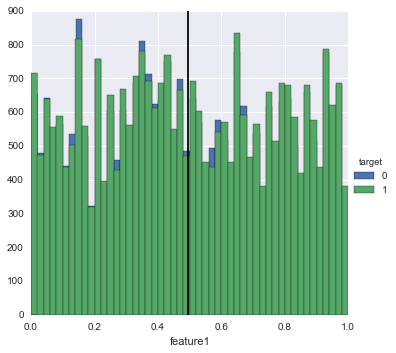

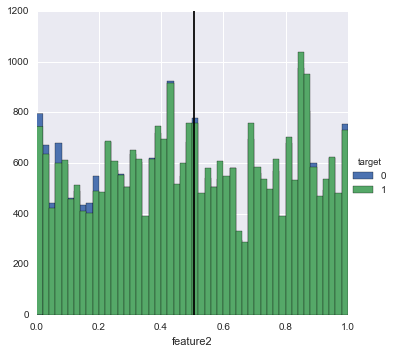

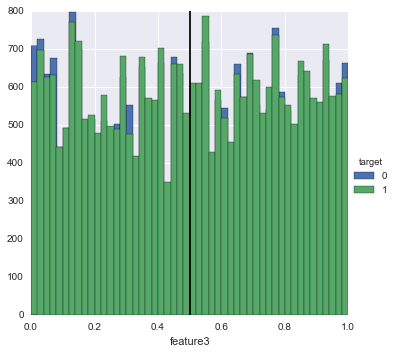

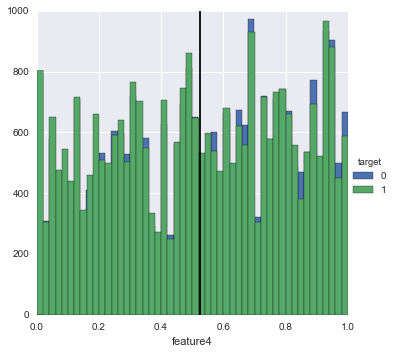

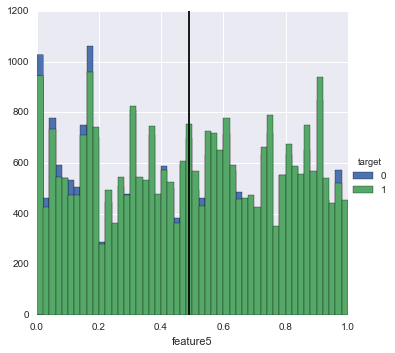

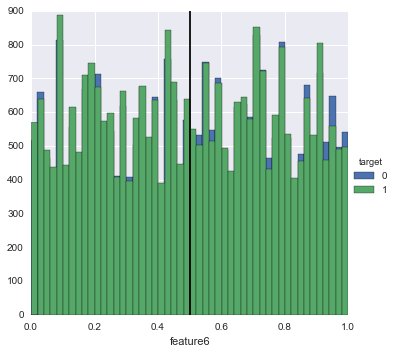

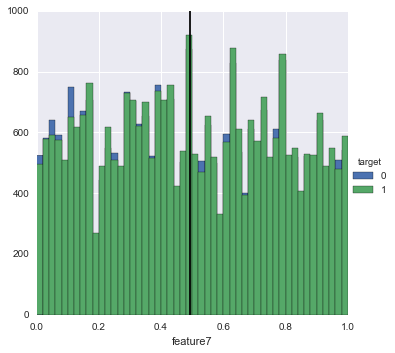

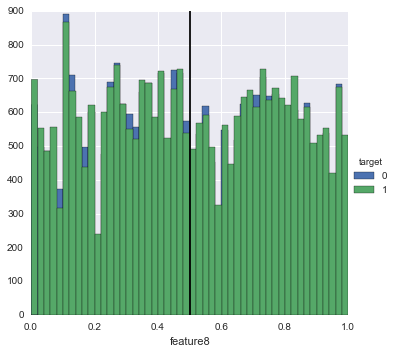

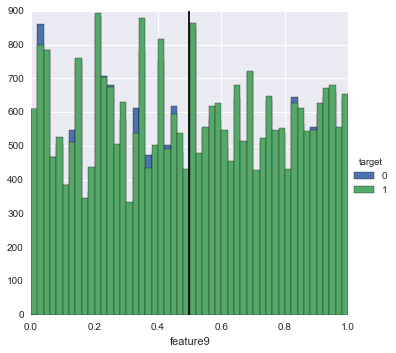

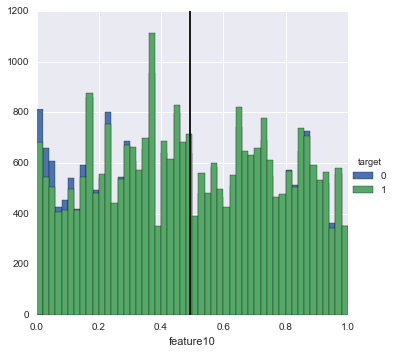

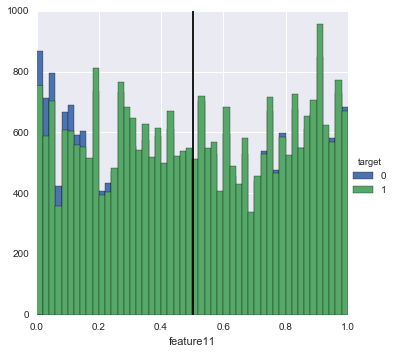

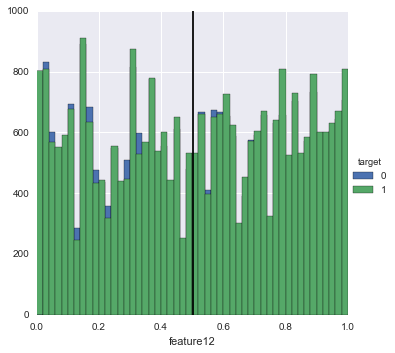

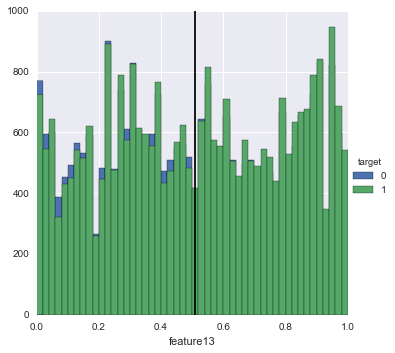

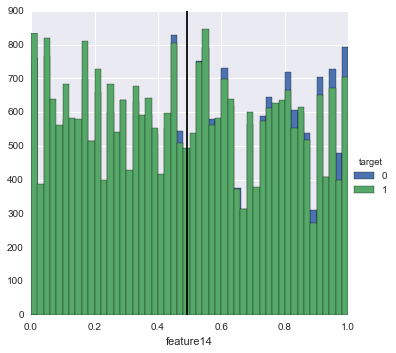

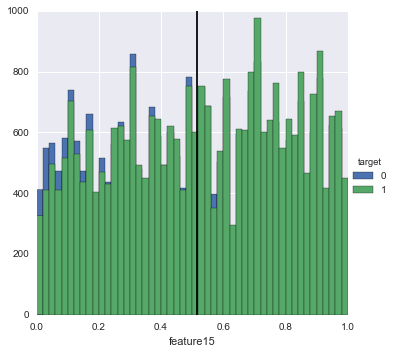

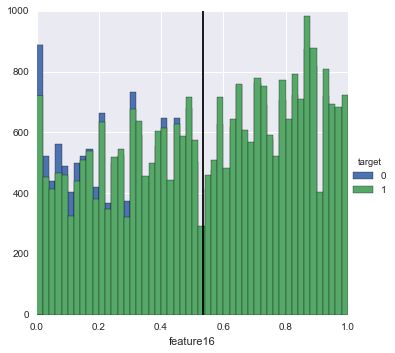

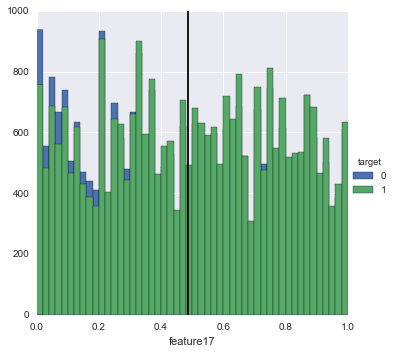

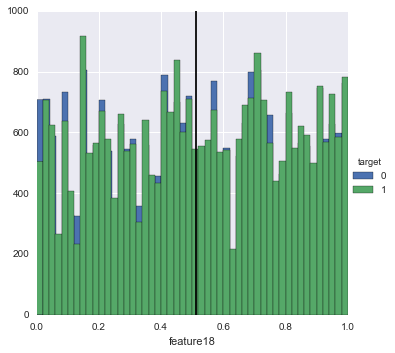

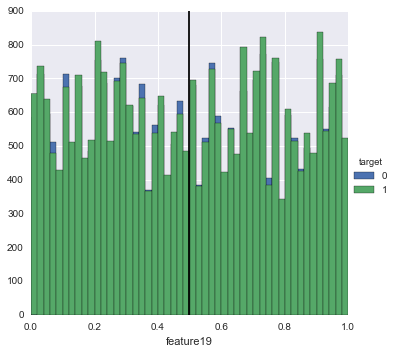

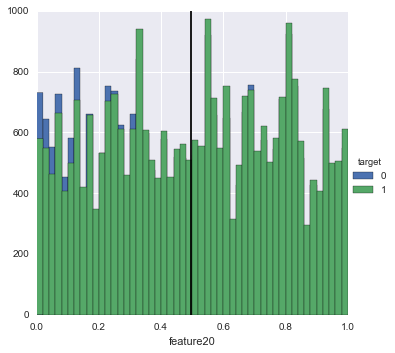

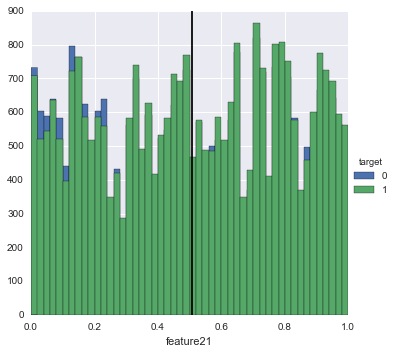

In [20]:
# plot histograms
features = train.columns[:-1]

for f in features:
    sns.FacetGrid(train, hue='target', size=5) \
       .map(plt.hist, f, bins=50) \
       .add_legend()
    
    plt.axvline(train[f].mean(), color='black');

## Set up feature and target variables

In [34]:
features = train.columns.drop('target')

X = train[features]
y = train.target

## Set up random seed for reproducability

In [35]:
np.random.seed(1279)

## Dimensionality Reduction

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

In [37]:
# covariance matrix
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [38]:
print 'Eigenvalues \n%s' %(eigen_vals)

Eigenvalues 
[ 0.53061487  0.28798535  0.23304418  0.13397695  0.11686051  0.11175761
  0.07120677  0.06072822  0.03709215  0.03099025  0.02470882  0.02205842
  0.02018685  0.00501068  0.01648733  0.00586567  0.01542945  0.00728318
  0.00788294  0.01446364  0.01105125]


In [39]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

In [40]:
cum_var_exp = np.cumsum(var_exp)

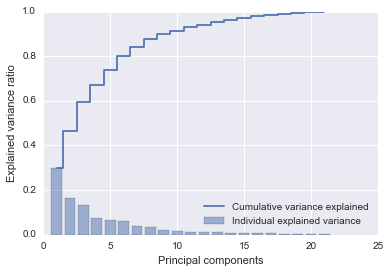

In [42]:
plt.bar(range(1, 22), var_exp, alpha=.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 22), cum_var_exp, where='mid',
         label='Cumulative variance explained')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [50]:
## Feature transformation
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

eigen_pairs.sort(reverse=True)

In [51]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

In [52]:
print 'Matrix W:\n', w

Matrix W:
[[ 0.23719718  0.01105125]
 [-0.22502793  0.01105125]
 [-0.26250142  0.01105125]
 [-0.24077424  0.01105125]
 [ 0.1206678   0.01105125]
 [-0.22420873  0.01105125]
 [-0.29553804  0.01105125]
 [ 0.2581983   0.01105125]
 [-0.28571404  0.01105125]
 [-0.12667061  0.01105125]
 [-0.14155042  0.01105125]
 [-0.27233011  0.01105125]
 [ 0.18802674  0.01105125]
 [-0.25548336  0.01105125]
 [ 0.20382253  0.01105125]
 [ 0.19712261  0.01105125]
 [ 0.13863607  0.01105125]
 [-0.2634564   0.01105125]
 [ 0.23866803  0.01105125]
 [ 0.13267562  0.01105125]
 [-0.10621645  0.01105125]]


In [53]:
X_train_pca = X_train.dot(w)

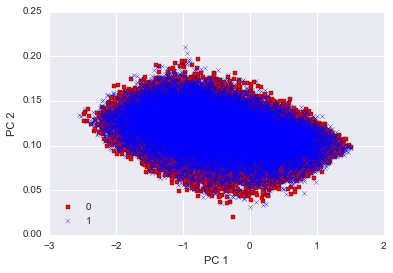

In [57]:
colors = ['r', 'b']
markers = ['s', 'x']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca.loc[y_train==l, 0],
                X_train_pca.loc[y_train==l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

## Kernel Principal Component Analysis in Python

In [74]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh

In [75]:
def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    
    K = exp(-gamma * mat_sq_dists)
    
    N = K.shape[0]
    one_N = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigvals, eigvecs = eigh(K)
    
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    return X_pc

In [ ]:
X_kpca = rbf_kernel_pca(X_train, gamma=15, n_components=2)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1)) - 0.02, color='blue', marker='o', alpha=0.5)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_ytickcs([])
ax[1].set_xlabel('PC1')

plt.show()